In [1]:
'''import thpe libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

plt.style.use('fivethirtyeight')

In [2]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan.csv', low_memory=False)

In [3]:
'''How many rows and columns?'''
loan_data.shape

(2260668, 145)

In [4]:
'''Take a glance on the data'''
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
'''A glance of the numericadl distribution'''
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
'''
A first look at the data, null values, data types, unique values etc.
Check which columns are having all null values. We need to drop those columns.
Also, check the columns having one or more null values. We need to take care of them.
'''
cols = loan_data.columns
null_count = 0
null_pct = 'None'
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    if loan_data[col].isnull().all():
        null_count = 'all'
        null_pct = '100%'
    else:
        null_count = loan_data[col].isnull().sum()
        total_records = len(loan_data)
        if null_count > 0 and null_count < total_records*(0.1):
            null_pct = 'less than 10%'
        elif null_count >= total_records*(0.1) and null_count < total_records*(0.2):
            null_pct = '10 to 20%'
        elif null_count >= total_records*(0.2) and null_count < total_records*(0.3):
            null_pct = '20 to 30%'
        elif null_count >= total_records*(0.3) and null_count < total_records*(0.4):
            null_pct = '30 to 40%'
        elif null_count >= total_records*(0.4) and null_count < total_records*(0.5):
            null_pct = '40 to 50%'
        elif null_count >= total_records*(0.5) and null_count < total_records*(0.75):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.75) and null_count < total_records*(0.9):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.9):
            null_pct = 'more than 90%'
    

    d.append({'col': col, 'null_count': null_count, 'null_pct': null_pct, 'd_type': d_types[col], 
              'n_unique': loan_data[col].nunique()})
    null_count = 0
    null_pct = 'None'
    
    
loan_data_info = pd.DataFrame(d)
# loan_data_info.sort_values('col', inplace=True, ascending=True)
# loan_data_info.reset_index()
# Write the loan_data_info to CSV file
# loan_data_info.to_csv('loan_features.csv', sep=',', encoding='UTF-8')

# Write the loan_data_info to .xlsx file
loan_data_info.to_csv('loan_features.xlsx')

# Display the dataframe as HTML table
display(HTML(loan_data_info.to_html()))
    
    

,col,null_count,null_pct,d_type,n_unique
0,id,all,100%,float64,0
1,member_id,all,100%,float64,0
2,loan_amnt,0,None,int64,1572
3,funded_amnt,0,None,int64,1572
4,funded_amnt_inv,0,None,float64,10057
5,term,0,None,object,2
6,int_rate,0,None,float64,673
7,installment,0,None,float64,93296
8,grade,0,None,object,7
9,sub_grade,0,None,object,35


In [7]:
'''How many missing values in the data set?'''
loan_data_info['null_pct'].value_counts()

less than 10%    54
more than 90%    35
None             32
30 to 40%        12
50 to 75%         6
100%              3
40 to 50%         2
10 to 20%         1
Name: null_pct, dtype: int64

In [8]:
'''What is the major data types?'''
loan_data_info['d_type'].value_counts()

float64    105
object      36
int64        4
Name: d_type, dtype: int64

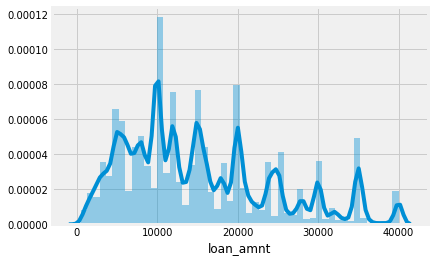

In [9]:
'''Maximum loan amount range is $5k to $ 20k'''
sns.distplot(loan_data['loan_amnt'])

plt.show()

In [10]:
'''There are two loan terms'''
loan_data['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

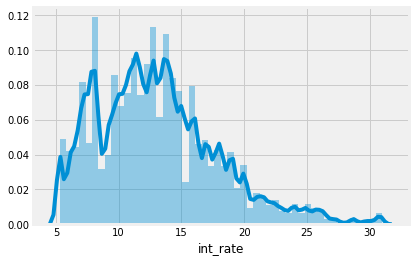

In [11]:
'''Most of the interest range is between 5% to 15%'''
sns.distplot(loan_data['int_rate'])

plt.show()

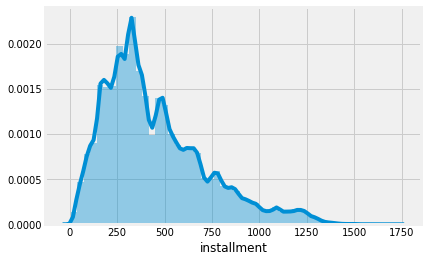

In [12]:
'''Most of the installment range is between $200 to $500'''
sns.distplot(loan_data['installment'])

plt.show()

In [13]:
'''LC assigned grade and sub grade counts'''
loan_data.groupby(['grade', 'sub_grade']).count()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
grade sub_grade                                                           
A     A1          0          0      86790        86790            86790   
      A2          0          0      69562        69562            69562   
      A3          0          0      73184        73184            73184   
      A4          0          0      95874        95874            95874   
      A5          0          0     107617       107617           107617   
B     B1          0          0     125341       125341           125341   
      B2          0          0     126621       126621           126621   
      B3          0          0     131514       131514           131514   
      B4          0          0     139793       139793           139793   
      B5          0          0     140288       140288           140288   
C     C1          0          0     145903       145903           145903   
      C2          0          0     131116       131116           131116   
      C3          0          0     129193       129193           129193   
      C4          0          0     127115       127115           127115   
      C5          0          0     116726       116726           116726   
D     D1          0          0      81787        81787            81787   
      D2          0          0      72899        72899            72899   
      D3          0          0      64819        64819            64819   
      D4          0          0      56896        56896            56896   
      D5          0          0      48023        48023            48023   
E     E1          0          0      33573        33573            33573   
      E2          0          0      29924        29924            29924   
      E3          0          0      26708        26708            26708   
      E4          0          0      22763        22763            22763   
      E5          0          0      22671        22671            22671   
F     F1          0          0      13413        13413            13413   
      F2          0          0       9305         9305             9305   
      F3          0          0       7791         7791             7791   
      F4          0          0       6124         6124             6124   
      F5          0          0       5167         5167             5167   
G     G1          0          0       4106         4106             4106   
      G2          0          0       2688         2688             2688   
      G3          0          0       2094         2094             2094   
      G4          0          0       1712         1712             1712   
      G5          0          0       1568         1568             1568   

                   term  int_rate  installment  emp_title  emp_length  ...  \
grade sub_grade                                                        ...   
A     A1          86790     86790        86790      80272       81426  ...   
      A2          69562     69562        69562      64194       65023  ...   
      A3          73184     73184        73184      67490       68418  ...   
      A4          95874     95874        95874      88535       89816  ...   
      A5         107617    107617       107617     100034      101247  ...   
B     B1         125341    125341       125341     115924      116961  ...   
      B2         126621    126621       126621     117134      118362  ...   
      B3         131514    131514       131514     121940      123117  ...   
      B4         139793    139793       139793     129528      130886  ...   
      B5         140288    140288       140288     130124      131098  ...   
C     C1         145903    145903       145903     135122      136254  ...   
      C2         131116    131116       131116     121519      122484  ...   
      C3         129193    129193       129193     119749      120779  ...   
      C4         127115    127115       127115     117990      118901  

In [14]:
'''Employment length of the applicant(s)'''
loan_data['emp_length'].value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [15]:
'''Home ownership status of the applicant(s)'''
loan_data['home_ownership'].value_counts()

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [30]:
'''
There are 4 missing values in annual_inc column. 
We will fill them in using median value.
Median: 65000.0
Mean: 77992.42868706721
'''
#loan_data['annual_inc'].fillna(loan_data['annual_inc'].median(), inplace=True)
#sns.distplot(loan_data['annual_inc'])

annual_inc = loan_data['annual_inc']
sns.distplot(x=annual_inc)

#plt.show()

TypeError: distplot() got an unexpected keyword argument 'x'

In [89]:
'''We can use this feature and calculate the age of credit hostory'''
loan_data['earliest_cr_line']
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].astype('datetime64[ns]')

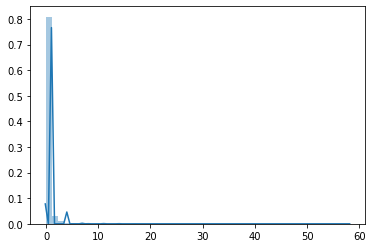

In [87]:
loan_data['delinq_2yrs'].fillna(loan_data['delinq_2yrs'].median(), inplace=True)
sns.distplot(loan_data['delinq_2yrs'].values)
plt.show()

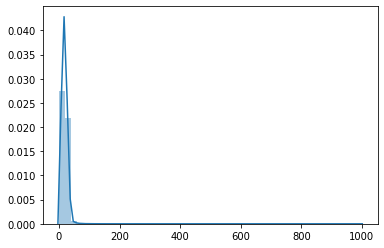

In [86]:
loan_data['dti'].fillna(loan_data['dti'].median(), inplace=True)
sns.distplot(loan_data['dti'].values)
plt.show()

In [77]:
loan_data['purpose'].value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

In [75]:
loan_data['pymnt_plan'].value_counts()

n    2259986
y        682
Name: pymnt_plan, dtype: int64

In [73]:
'''This is the target variable to find out the bad loan(s) or default loan(s)'''
loan_data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [59]:
loan_data_info['d_type'].value_counts()

float64    105
object      36
int64        4
Name: d_type, dtype: int64

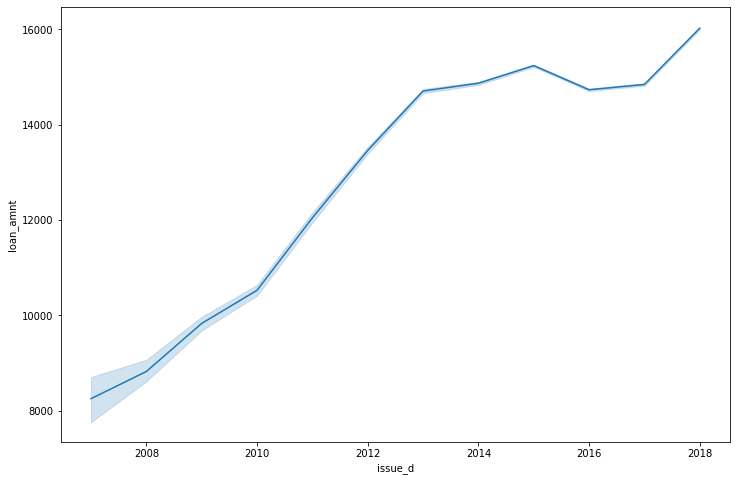

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(x=loan_data['issue_d'].dt.year, y=loan_data['loan_amnt'], data=loan_data)
plt.show()

In [65]:
loan_data['verification_status'].value_counts()

Source Verified    886231
Not Verified       744806
Verified           629631
Name: verification_status, dtype: int64

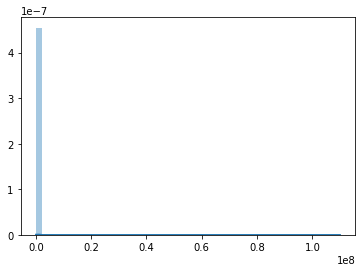

In [64]:
'''
We have only 4 values missing. 
We can fill them using median. 
The histogram does not look right below. 
We will look at it later.
'''
loan_data['annual_inc'].fillna(loan_data['annual_inc'].median(), inplace=True)
sns.distplot(loan_data['annual_inc'].values)
plt.show()

In [61]:
loan_data['home_ownership'].value_counts()

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [62]:
loan_data['emp_length'].value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [67]:
loan_data_info['null_pct'].value_counts()

less than 10%    54
more than 90%    35
None             32
30 to 40%        12
50 to 75%         6
100%              3
40 to 50%         2
10 to 20%         1
Name: null_pct, dtype: int64

In [ ]:
sns.distplot(loan_data['installment'].values, rug=True)
plt.show()

In [ ]:
sns.distplot(loan_data['int_rate'].values, rug=True)
plt.show()

In [ ]:
'''
There are 4 columns having all null values, first drop them.
'''
all_null_cols = loan_data_info[loan_data_info['null_count']=='all'].col

loan_data.drop(all_null_cols, axis=1, inplace=True)


In [ ]:
'''Take a look at the different loan status including Current loans'''
loan_data["loan_status"].value_counts()

In [ ]:
'''
We will drop all the Current loans. 
We will work on only the completed loans.
Current loans may or may not turn into a good or bad loan.
'''
loan_data[loan_data["loan_status"]=='Current']

indexNames = loan_data[loan_data["loan_status"]=='Current'].index
loan_data.drop(indexNames , inplace=True)

In [ ]:
'''How many columns have 90% or more data null?'''
len(loan_data_info[loan_data_info['null_pct']=='more than 90%'])

In [68]:
'''
Convert the String date columns into python datetime
'''
loan_data['issue_d'] = loan_data['issue_d'].astype('datetime64[ns]')

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = loan_data["loan_amnt"].values
funded_amount = loan_data["funded_amnt"].values
investor_funds = loan_data["funded_amnt_inv"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower")
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender")
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors")

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(loan_data['issue_d'].dt.year, 'loan_amnt', data=loan_data, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

plt.show()

In [ ]:
loan_data["loan_status"].value_counts()

In [ ]:
'''Determining the loans that are bad from loan_status column'''

# These statuses are categorized as bad loan
bad_loan = ["Charged Off", 
            "Default", 
            "Does not meet the credit policy. Status:Charged Off", 
            "In Grace Period", 
            "Late (16-30 days)", 
            "Late (31-120 days)"]

loan_data['loan_closing_status'] = np.nan


def loan_closing_status(status):
    if status in bad_loan:
        return 'bad'
    else:
        return 'good'
    

# add the column
loan_data['loan_closing_status'] = loan_data['loan_status'].apply(loan_closing_status)

# plot the graph for good loan and bad loan comparision
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Closing Status', fontsize=20)

loan_data["loan_closing_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', 
                                                    ax=ax[0], shadow=True, colors=colors, 
                                                    labels=labels, fontsize=12, startangle=70)


ax[0].set_xlabel('% of Closing Status of Loans', fontsize=14)

palette = ["#3791D7", "#E01E1B"]

sns.barplot(x=loan_data['issue_d'].dt.year, y="loan_amnt", 
            hue="loan_closing_status", data=loan_data, 
            palette=palette, estimator=lambda x: len(x) / len(loan_data) * 100)

ax[1].set(ylabel="(%)")


In [ ]:
badloans_df = loan_data.loc[loan_data["loan_closing_status"] == "bad"]
badloans_df

In [ ]:
'''Take a deeper look at the bad loans'''
badloans_df = loan_data.loc[loan_data["loan_closing_status"] == "bad"]

loan_status_cross = pd.crosstab(badloans_df['addr_state'], badloans_df['loan_closing_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['addr_state'], badloans_df['loan_closing_status'])

loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))

loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))

loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 

display(HTML(number_of_loanstatus.to_html()))

In [ ]:
loan_data['addr_state'].nunique()